# Stroke Rehabilitation

## Data Analysis

In [9]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = loadmat('data/sourcedata/sub-01/sub-01_task-motor-imagery_eeg.mat')
eeg_data = data['eeg']

In [11]:
print(eeg_data.shape)
print(eeg_data.dtype)

(1, 1)
[('rawdata', 'O'), ('label', 'O')]


### EEG data labels

+ "1": "Imagining the movement of the left hand",
+ "2": "Imagining the movement of the right hand"

In [12]:
print(eeg_data['label'])

[[array([[1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2],
         [1],
         [2]], dtype=uint8)]]


In [13]:
print(eeg_data['rawdata'])

[[array([[[8.49312645e+03, 8.49241120e+03, 8.48436457e+03, ...,
           8.17848094e+03, 8.17784952e+03, 8.17747512e+03],
          [5.22586021e+03, 5.22440734e+03, 5.22161337e+03, ...,
           5.28323713e+03, 5.28301665e+03, 5.28198544e+03],
          [1.04677690e+04, 1.04672772e+04, 1.04657126e+04, ...,
           1.04541344e+04, 1.04538724e+04, 1.04536203e+04],
          ...,
          [4.07098580e+04, 4.07150213e+04, 4.07149319e+04, ...,
           4.06870369e+04, 4.06856207e+04, 4.06823654e+04],
          [3.60827564e+04, 3.60855280e+04, 3.60847233e+04, ...,
           3.59955845e+04, 3.59950964e+04, 3.59942881e+04],
          [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

         [[8.17765393e+03, 8.17903974e+03, 8.18190076e+03, ...,
           8.33777742e+03, 8.34562729e+03, 8.34609587e+03],
          [5.28426531e+03, 5.28303597e+03, 5.28397474e+03, ...,
           5.36862371e+03, 5.36913489e+03, 5.369361

### EEG raw data
+ 3 Dimensions (trials × channels × time-samples)
+ number of trials is 40, the number of channels is 33, and there are 30 EEG channels (channel 18 is reference channel), 2 EOG channels (31 horizontal EOG channels and 32 vertical EOG channels), and 1 marker event channel; the number of time samples was 4,000.

In [14]:
eeg_data_array = eeg_data['rawdata'][0][0]
print(eeg_data_array.shape)
print(eeg_data_array)

(40, 33, 4000)
[[[8.49312645e+03 8.49241120e+03 8.48436457e+03 ... 8.17848094e+03
   8.17784952e+03 8.17747512e+03]
  [5.22586021e+03 5.22440734e+03 5.22161337e+03 ... 5.28323713e+03
   5.28301665e+03 5.28198544e+03]
  [1.04677690e+04 1.04672772e+04 1.04657126e+04 ... 1.04541344e+04
   1.04538724e+04 1.04536203e+04]
  ...
  [4.07098580e+04 4.07150213e+04 4.07149319e+04 ... 4.06870369e+04
   4.06856207e+04 4.06823654e+04]
  [3.60827564e+04 3.60855280e+04 3.60847233e+04 ... 3.59955845e+04
   3.59950964e+04 3.59942881e+04]
  [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[8.17765393e+03 8.17903974e+03 8.18190076e+03 ... 8.33777742e+03
   8.34562729e+03 8.34609587e+03]
  [5.28426531e+03 5.28303597e+03 5.28397474e+03 ... 5.36862371e+03
   5.36913489e+03 5.36936170e+03]
  [1.04578448e+04 1.04578001e+04 1.04583812e+04 ... 1.05019012e+04
   1.05035541e+04 1.05037683e+04]
  ...
  [4.06836171e+04 4.06864557e+04 4.06922672e+04 ... 4.05851842

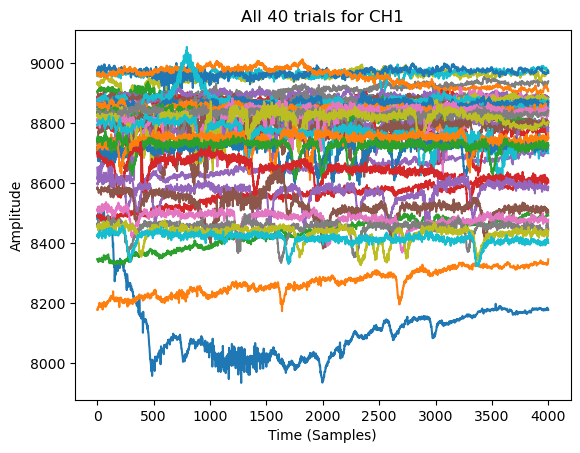

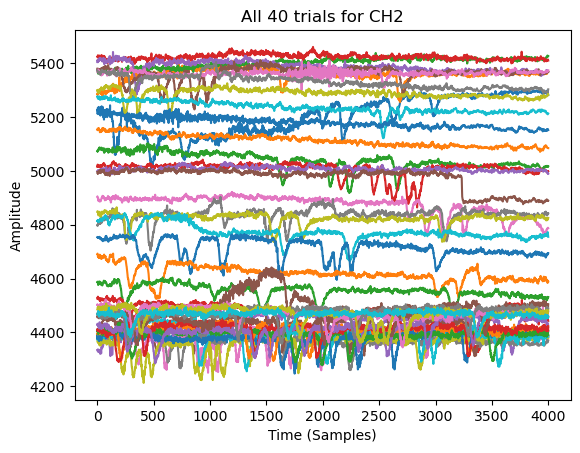

In [26]:
for i in range(40):
    plt.plot(eeg_data_array[i, 0, :])
plt.title('All 40 trials for CH1')
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude')
plt.show()

for i in range(40):
    plt.plot(eeg_data_array[i, 1, :])
plt.title('All 40 trials for CH2')
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude')
plt.show()

## Reading the EDF data

The prefiltered eeg data is stored in EDF files per patient.

In [17]:
import pyedflib

file_path = 'data/sourcedata/sub-01/sub-01_task-motor-imagery_eeg.edf'

33
['FP1', 'FP2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FCz', 'FC3', 'FC4', 'FT7', 'FT8', 'Cz', 'C3', 'C4', 'T3', 'T4', 'CPz', 'CP3', 'CP4', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'T5', 'T6', 'Oz', 'O1', 'O2', 'HEOL', 'HEOR', '']
500.0


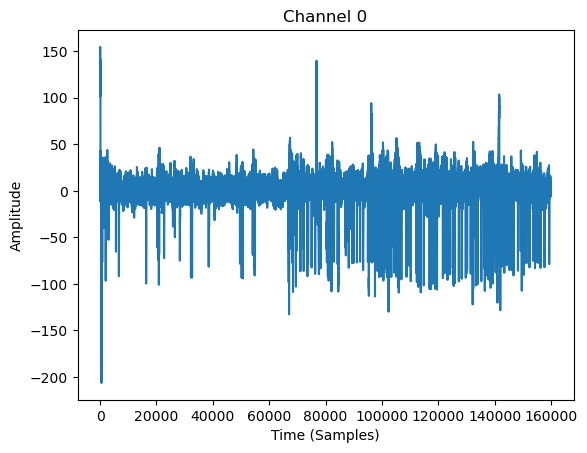

In [ ]:
with pyedflib.EdfReader(file_path) as f:
    print(f.signals_in_file)
    print(f.getSignalLabels())
    print(f.getSampleFrequency(0))

    signal_data = f.readSignal(0)
    plt.plot(signal_data)
    plt.title('Channel %s' % 0)
    plt.xlabel('Time (Samples)')
    plt.ylabel('Amplitude')
    plt.show()